### This script will show 
 - how to make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
 - a confusion matrix of false classifications only
 - classification report generation from confusion matrix

In [3]:
import SimpleITK as sitk
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

exptfolder = "m19swinvotex"

selectslices = [5, 9, 13, 17, 21]
selectpatientids = [2, 23, 29, 33, 43]
selectvisitnumbs = [1, 2, 3, 4, 5]

s1 = np.zeros([len(selectslices),256,256])
s2 = np.zeros([len(selectslices),256,256])
s3 = np.zeros([len(selectslices),256,256])
s4 = np.zeros([len(selectslices),256,256])
s5 = np.zeros([len(selectslices),256,256])

dirName = f"/Users/bthomas/Downloads/data_for_Belvin/midl24/{exptfolder}/seg_stpl/after_cc"
i1 = sitk.GetArrayFromImage(sitk.ReadImage(f"{dirName}/segA{selectpatientids[0]:03}_v{str(selectvisitnumbs[0])}_T2W.nii.gz"))
i2 = sitk.GetArrayFromImage(sitk.ReadImage(f"{dirName}/segA{selectpatientids[1]:03}_v{str(selectvisitnumbs[1])}_T2W.nii.gz"))
i3 = sitk.GetArrayFromImage(sitk.ReadImage(f"{dirName}/segA{selectpatientids[2]:03}_v{str(selectvisitnumbs[2])}_T2W.nii.gz"))
i4 = sitk.GetArrayFromImage(sitk.ReadImage(f"{dirName}/segA{selectpatientids[3]:03}_v{str(selectvisitnumbs[3])}_T2W.nii.gz"))
i5 = sitk.GetArrayFromImage(sitk.ReadImage(f"{dirName}/segA{selectpatientids[4]:03}_v{str(selectvisitnumbs[4])}_T2W.nii.gz"))

for i in range(len(selectslices)):
    s1[i,:,:] = i1[selectslices[i]]
    s2[i,:,:] = i2[selectslices[i]]
    s3[i,:,:] = i3[selectslices[i]]
    s4[i,:,:] = i4[selectslices[i]]
    s5[i,:,:] = i5[selectslices[i]]

    
seg = np.flipud(np.fliplr((np.vstack((s1, s2, s3, s4, s5)))))
segimage = sitk.GetImageFromArray(seg)
# sitk.WriteImage(segimage,f'/Users/bthomas/Downloads/data_for_Belvin/midl24/{exptfolder}/seg_stpl/Autoseg_{exptfolder}.nii.gz')
# 

<IPython.core.display.Javascript object>


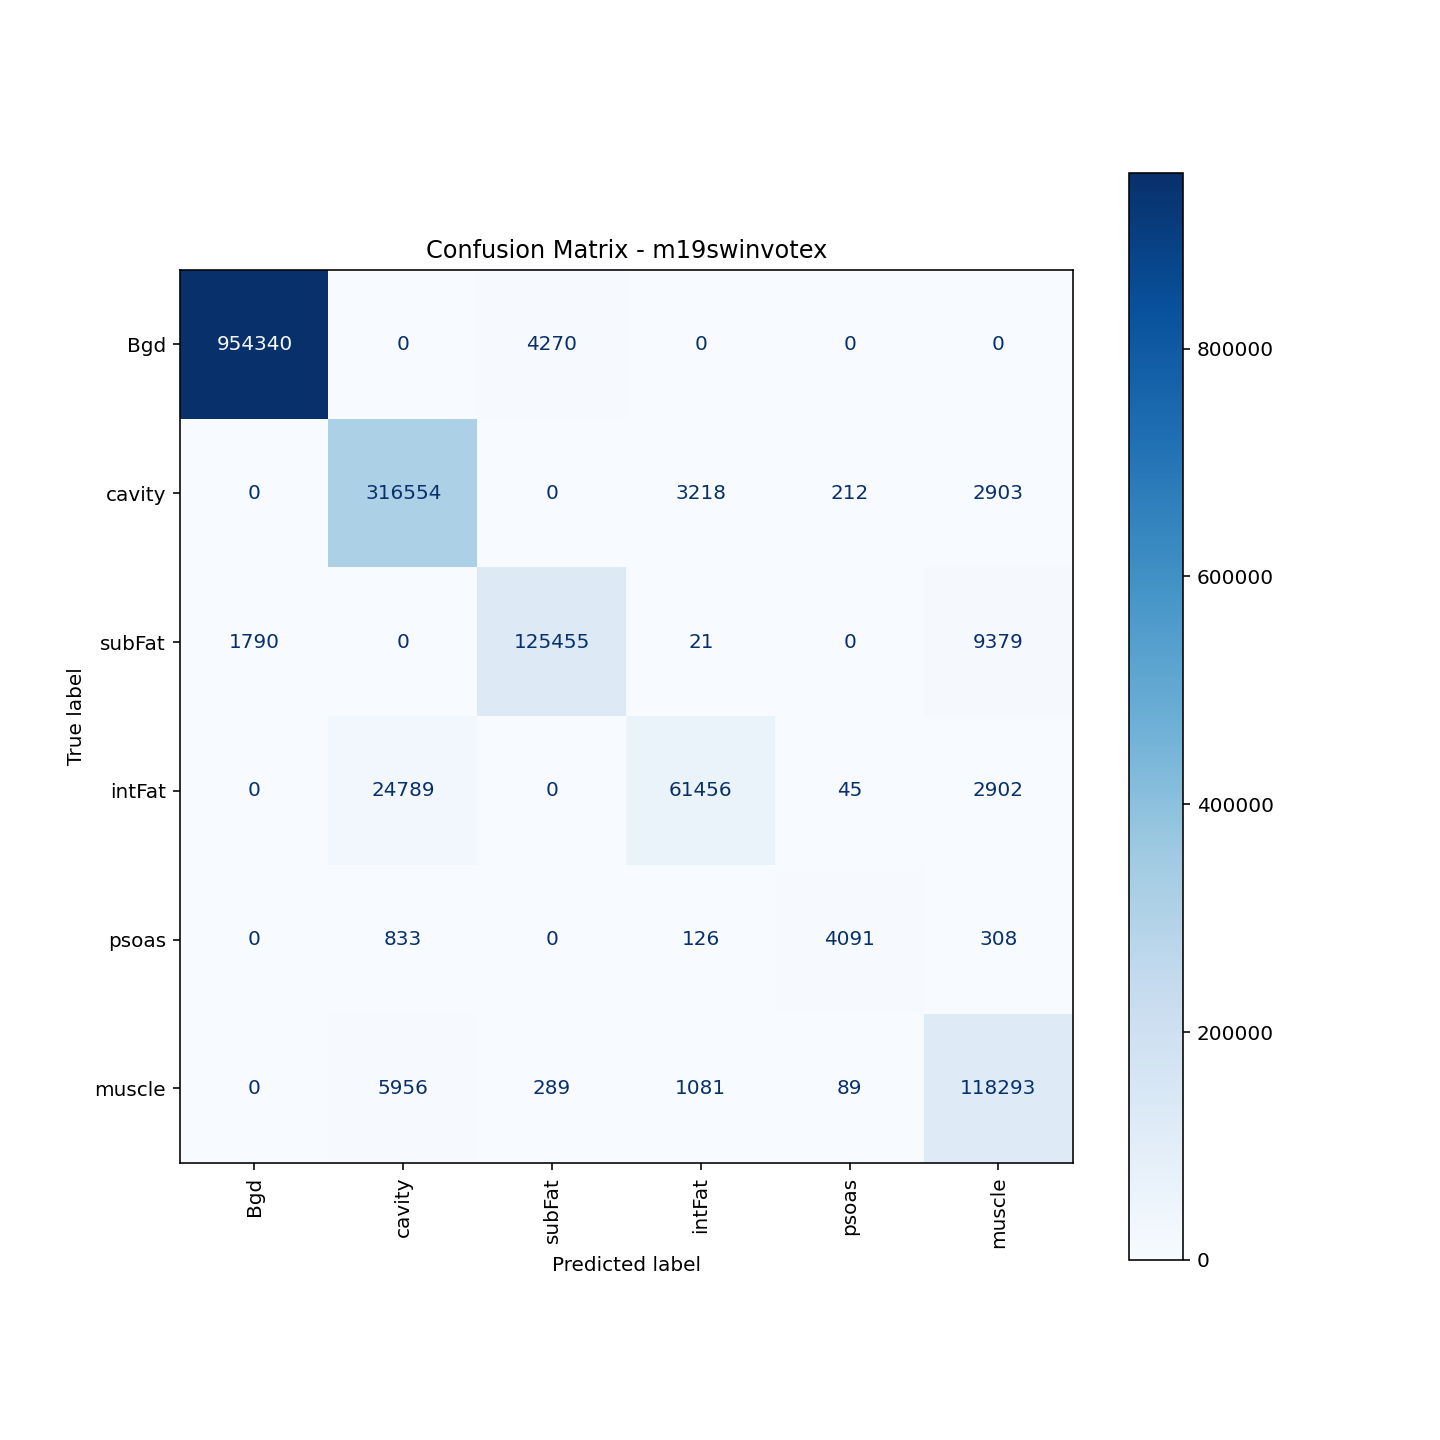

<IPython.core.display.Javascript object>


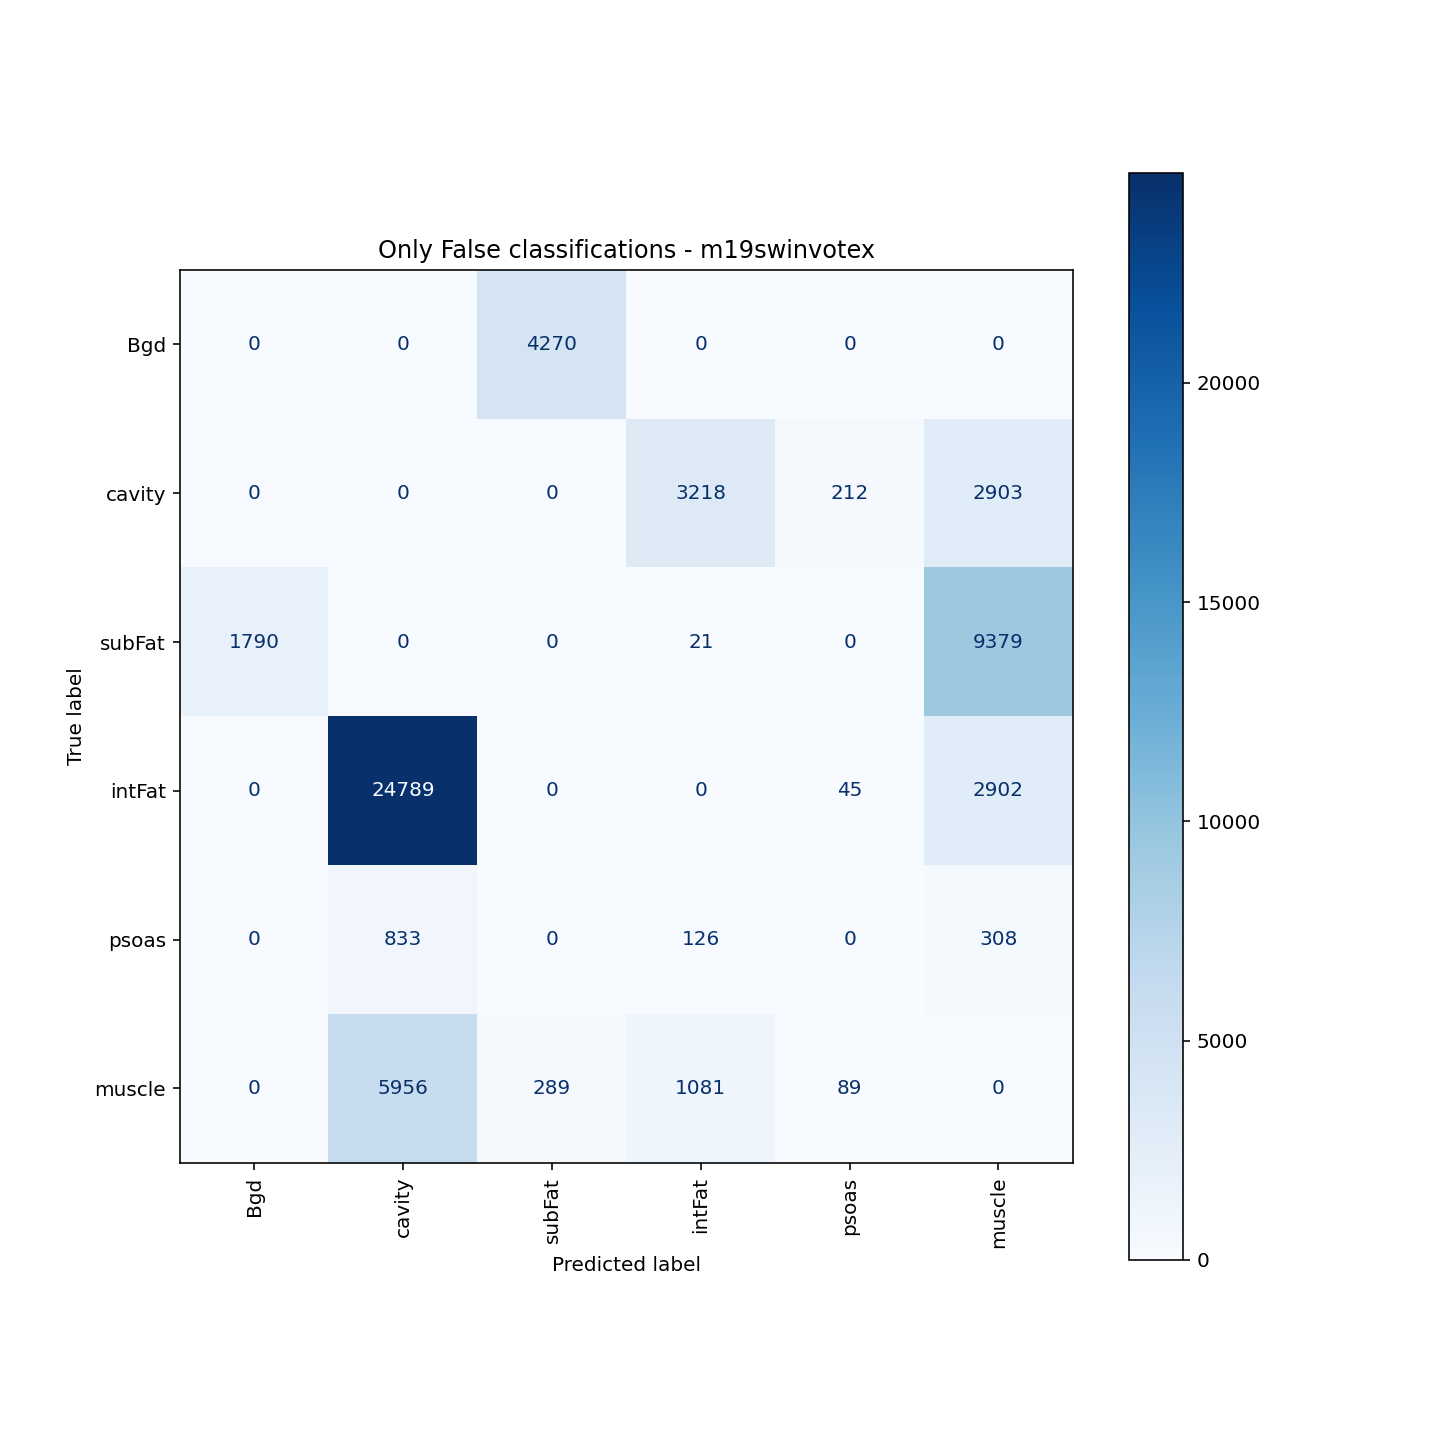

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import SimpleITK as sitk

%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

gt = sitk.GetArrayFromImage(sitk.ReadImage("/Users/bthomas/Downloads/MR_Sarcopaenia/STAPLEoutputs/Staplemask.nii.gz"))

ytrue = gt.reshape(-1)
ypred = seg.reshape(-1)
cm= confusion_matrix(ytrue,ypred)
actual_cm =cm.copy()
np.fill_diagonal(cm, 0)
# Normalize the confusion matrix
# cm_normalized = cm.astype('float') / cm.sum(axis=0)[np.newaxis,:]
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=actual_cm,display_labels=['Bgd','cavity','subFat','intFat','psoas','muscle'])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
# disp.im_.set_clim(0, 1)
plt.title(f"Confusion Matrix - {exptfolder}")
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Bgd','cavity','subFat','intFat','psoas','muscle'])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
# disp.im_.set_clim(0, 1)
plt.title(f"Only False classifications - {exptfolder}")
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='jet',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
#     cf_normalised = cf/cf.sum(axis=1)[:,np.newaxis]   # Rel percentage of false Negatives  (sum is 100 along each raw)
    cf_normalised = cf/cf.sum(axis=0)[np.newaxis,:] # Rel percentage of false Positives (sum is 100 along each column)

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.002}".format(value) for value in cf_normalised.flatten()]
#         group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
   
    sns.heatmap(cf_normalised,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<IPython.core.display.Javascript object>


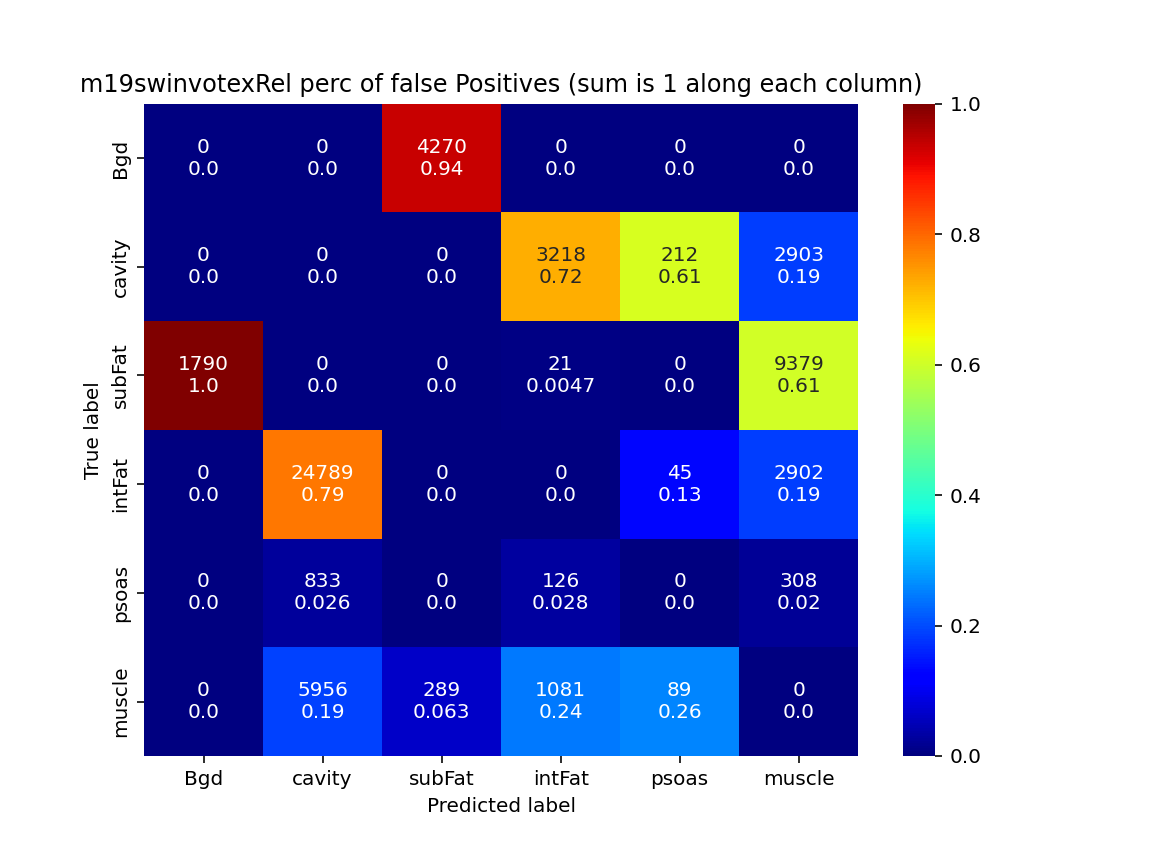

In [6]:
# from cf_matrix import make_confusion_matrix

# group_counts = [value for value in cm.flatten()]
# group_percentages = [value for value in cm.flatten()/np.sum(cm)]
# labels = [print(v1 '\n' v2) for v1, v2 in zip(group_counts,group_percentages)]
# sns.heatmap(cm, annot=labels, cmap='jet')

make_confusion_matrix(cm, group_names=['Bgd','cavity','subFat','intFat','psoas','muscle'],\
                      categories=['Bgd','cavity','subFat','intFat','psoas','muscle'],sum_stats=False,figsize=(8,6), cbar=True, title =f'{exptfolder}Rel perc of false Positives (sum is 1 along each column)')
# Rel perc of false Positives (sum is 1 along each column)
# Rel perc of false Negatives (sum is 1 along each raw)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(ytrue, ypred, target_names=['Bgd','cavity','subFat','intFat','psoas','muscle']))

              precision    recall  f1-score   support

         Bgd       1.00      1.00      1.00    958610
      cavity       0.91      0.98      0.94    322887
      subFat       0.96      0.92      0.94    136645
      intFat       0.93      0.69      0.79     89192
       psoas       0.92      0.76      0.84      5358
      muscle       0.88      0.94      0.91    125708

    accuracy                           0.96   1638400
   macro avg       0.94      0.88      0.90   1638400
weighted avg       0.97      0.96      0.96   1638400

